<a href="https://colab.research.google.com/github/Quang-Trong-Tan-Loc/AI/blob/main/BT11_classify_food_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
from os import listdir
from numpy import asarray
from numpy import save
import numpy as np
from keras.utils import load_img, img_to_array
from keras.utils import to_categorical

In [204]:
folder = '/content/drive/MyDrive/Data_CNN/Train/food'
food = ['Banh mi', 'Banh pia', 'Banh tet', 'Banh xeo', 'Bun bo Hue', 'Ca kho to', 'Banh bot loc','Xoi xeo','Nem chua','Bun rieu']
photos, lables = list(), list()
for i in range (10):
  filename = folder +'/'+ food[i] + '/'
  for file in listdir (filename):
    photo = load_img (filename + file, target_size=(128,128))
    photo = img_to_array(photo)
    photos.append(photo)
    lables.append(i)
photos = asarray(photos)
lables = asarray(lables)

In [205]:
print(photos.shape)
print(lables.shape)

(3427, 128, 128, 3)
(3427,)


In [206]:
from keras.utils import to_categorical
y = to_categorical(lables)
print(y.shape)

(3427, 10)


In [207]:
train_X = photos.astype('float32')/255


In [208]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization, Input
from keras.optimizers import Adam #toc do hoc 0.01 with Adam
from keras.losses import categorical_crossentropy
import matplotlib.pyplot as plt

In [209]:
batch_size = 64
epochs = 10
classes = 10

In [210]:
model = Sequential()
model.add(Conv2D(32, kernel_size =(3,3), activation= 'linear', input_shape= (128,128,3), padding = 'same'))
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64,(3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128,(3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(Flatten())
#-----------------------------------------------------------------------------------------------------------
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))
model.compile(loss = categorical_crossentropy, optimizer = Adam(), metrics = ['accuracy'] )

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 leaky_re_lu_48 (LeakyReLU)  (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 leaky_re_lu_49 (LeakyReLU)  (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                

In [237]:
train = model.fit(train_X, y, batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/10
54/54 [==============================] - 2s 41ms/step - loss: 0.0116 - accuracy: 0.9974
Epoch 2/10
54/54 [==============================] - 2s 41ms/step - loss: 0.0138 - accuracy: 0.9968
Epoch 3/10
54/54 [==============================] - 2s 41ms/step - loss: 0.0306 - accuracy: 0.9904
Epoch 4/10
54/54 [==============================] - 2s 41ms/step - loss: 0.0553 - accuracy: 0.9857
Epoch 5/10
54/54 [==============================] - 2s 44ms/step - loss: 0.1226 - accuracy: 0.9638
Epoch 6/10
54/54 [==============================] - 2s 42ms/step - loss: 0.0527 - accuracy: 0.9831
Epoch 7/10
54/54 [==============================] - 2s 41ms/step - loss: 0.0192 - accuracy: 0.9950
Epoch 8/10
54/54 [==============================] - 2s 41ms/step - loss: 0.0170 - accuracy: 0.9945
Epoch 9/10
54/54 [==============================] - 2s 40ms/step - loss: 0.0077 - accuracy: 0.9985
Epoch 10/10
54/54 [==============================] - 2s 41ms/step - loss: 0.0031 - accuracy: 0.9994


In [230]:
folder = '/content/drive/MyDrive/Data_CNN/Test/food'
food = ['Banh mi', 'Banh pia', 'Banh tet', 'Banh xeo', 'Bun bo Hue', 'Ca kho to', 'Banh bot loc','Xoi xeo','Nem chua','Bun rieu']
X_test, y_test = list(), list()
for i in range (10):
  filename = folder +'/'+ food[i] + '/'
  for file in listdir (filename):
    photo = load_img (filename + file, target_size=(128,128))
    photo = img_to_array(photo)
    X_test.append(photo)
    y_test.append(i)
X_test = asarray(X_test)
y_test = asarray(y_test)

In [231]:

print(X_test.shape)
print(y_test.shape)

(1234, 128, 128, 3)
(1234,)


In [232]:
from keras.utils import to_categorical
y_test = to_categorical(y_test)
X_test = X_test.astype('float32')/255

In [233]:
print(X_test.shape)
print(y_test.shape)

(1234, 128, 128, 3)
(1234, 10)


In [234]:
model.evaluate(X_test, y_test)

39/39 [==============================] - 0s 12ms/step - loss: 3.0764 - accuracy: 0.4968


[3.076432943344116, 0.49675852060317993]

1/1 [==============================] - 0s 19ms/step
Banh xeo
Banh mi


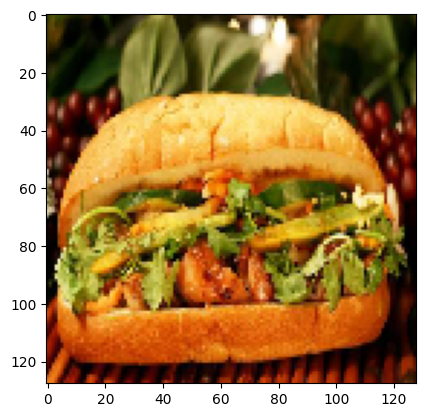

In [244]:
n = 
plt.imshow(X_test[n])
pred = model.predict(X_test[n].reshape((1, 128, 128,3)))
print(food[pred.argmax()])
print(food[y_test[n].argmax()])